# <font color = 'Orange'> <center> HOUSE PRICE PREDICTION USING ADVANCED REGRESSION </center>

####  <font color = 'Orange'> <center> ======================================================================================================== </center>

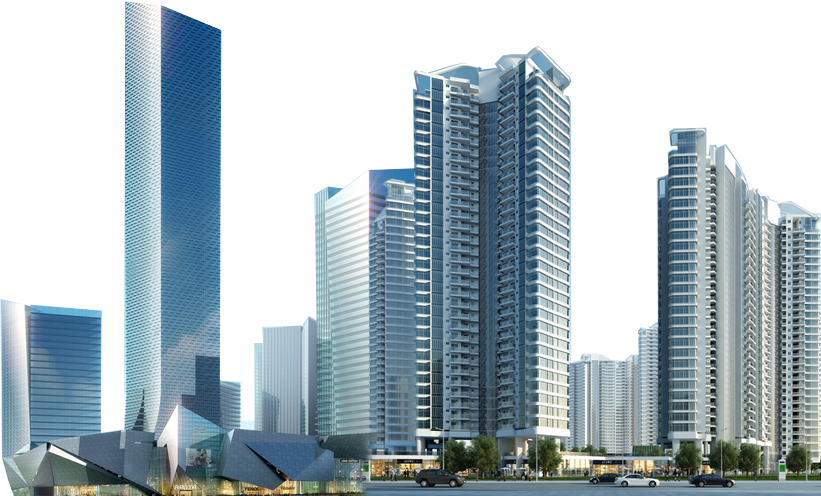

##  <font color = 'Green'><center> ======= Premise ======= </center>

**A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.**

 

**The company is looking at prospective properties to buy to enter the market. They wish to predict the actual value of the prospective properties and decide whether to invest in them or not.**

##  <font color = 'Green'><center> ======= Business Goal ======= </center>

**The requirement is to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.**


**The company wants to know:**

- **Which variables are significant in predicting the price of a house, and**

- **How well those variables describe the price of a house.**

## <font color = 'Blue'>Data Understanding

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading the data

In [2]:
df=pd.read_csv("train.csv",keep_default_na=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

# <font color = 'Orange'>Data Understanding

#### MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

#### MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
#### LotFrontage: Linear feet of street connected to property

#### LotArea: Lot size in square feet

#### Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
#### Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
#### LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
#### LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
#### Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
#### LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
#### LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
#### Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
#### Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
#### Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
#### BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
#### HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
#### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
#### OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
#### YearBuilt: Original construction date

#### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

#### RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
#### RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
#### Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
#### Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
#### MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
#### MasVnrArea: Masonry veneer area in square feet

#### ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
#### ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
#### Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
#### BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
#### BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
#### BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
#### BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
#### BsmtFinSF1: Type 1 finished square feet

#### BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

#### BsmtFinSF2: Type 2 finished square feet

#### BsmtUnfSF: Unfinished square feet of basement area

#### TotalBsmtSF: Total square feet of basement area

#### Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
#### HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
#### CentralAir: Central air conditioning

       N	No
       Y	Yes
		
#### Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
#### 1stFlrSF: First Floor square feet
 
#### 2ndFlrSF: Second floor square feet

#### LowQualFinSF: Low quality finished square feet (all floors)

#### GrLivArea: Above grade (ground) living area square feet

#### BsmtFullBath: Basement full bathrooms

#### BsmtHalfBath: Basement half bathrooms

#### FullBath: Full bathrooms above grade

#### HalfBath: Half baths above grade

#### Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

#### Kitchen: Kitchens above grade

#### KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
#### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

#### Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
#### Fireplaces: Number of fireplaces

#### FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
#### GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
#### GarageYrBlt: Year garage was built
		
#### GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
#### GarageCars: Size of garage in car capacity

#### GarageArea: Size of garage in square feet

#### GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
#### GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
#### PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
#### WoodDeckSF: Wood deck area in square feet

#### OpenPorchSF: Open porch area in square feet

#### EnclosedPorch: Enclosed porch area in square feet

#### 3SsnPorch: Three season porch area in square feet

#### ScreenPorch: Screen porch area in square feet

#### PoolArea: Pool area in square feet

#### PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
#### Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
#### MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
#### MiscVal: $Value of miscellaneous feature

#### MoSold: Month Sold (MM)

#### YrSold: Year Sold (YYYY)

#### SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
#### SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [3]:
#Data Shape
df.shape

(1460, 81)

In [4]:
total_records = len(df)

In [5]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [6]:
#Data description
df.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   443.639726    46.549315   567.240411   
std      30.202904     20.645407   456.098091   161.319273   441.866955   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000   223.000000   
50%    1973.000000   1994.000000   383.500000     0.000000   477.500000   
75%    2000.000000   2004.000000   712.250000     0.000000   808.000000   
max    2010.000000   2010.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       1.046575      6.517808     0.613014     1.767123   472.980137   
std        0.220338      1.625393     0.644666     0.747315   213.804841   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        1.000000      5.000000     0.000000     1.000000   334.500000   
50%        1.000000      6.000000     1.000000     2.000000   480.000000   
75%        1.000000      7.000000     1.000000     2.000000   576.000000   
max        3.000000     14.000000     3.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.00

In [7]:
#Let's gather all object type columns
object_columns = []
for obj in df.columns:
    if df[obj].dtype == np.object:
        object_columns.append(obj)
print(object_columns)

['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [8]:
#Let's check the Value Counts for all the Object Type Columns.
for c in df[object_columns]:
    print(f"======={c}=======")
    print(df[c].value_counts())

=======MSZoning=======
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
=======LotFrontage=======
NA     259
60     143
70      70
80      69
50      57
75      53
65      44
85      40
78      25
90      23
21      23
64      19
24      19
68      19
73      18
55      17
72      17
63      17
79      17
100     16
66      15
51      15
74      15
52      14
59      13
82      12
71      12
67      12
57      12
43      12
40      12
76      11
69      11
88      10
34      10
53      10
86      10
92      10
35       9
84       9
44       9
77       9
62       9
61       8
93       8
96       8
98       8
120      7
107      7
58       7
95       7
30       6
41       6
110      6
54       6
91       6
36       6
48       6
94       6
89       6
81       6
105      6
87       5
56       5
37       5
83       5
32       5
47       5
42       4
102      4
49       4
99       3
108      3
103      3
104      3
45       3
130   

Name: Foundation, dtype: int64
=======BsmtQual=======
TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64
=======BsmtCond=======
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64
=======BsmtExposure=======
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64
=======BsmtFinType1=======
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64
=======BsmtFinType2=======
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
=======Heating=======
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
=======HeatingQC=======
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
=======CentralAir=======
Y    1365
N      95
Name: CentralAir, dtype: int64
=======Electrical=======
SBrkr    1334
FuseA      94
Fu

### From data understanding it is evident that some object data data types are misclassified as integers. These need to be corrected.

In [9]:
## Convert three columns to 'object' type 
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

### Also some columns contain "NA" as a data value. They need to be replaced with "None"

In [10]:
NA_cols=["Alley","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

In [11]:
df[NA_cols]=df[NA_cols].replace("NA","None")

### Removing numeric attributes that have more than 95% data associated to one single value.

In [12]:
def redundant_feature(df, percent):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > percent:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

##Removing the skewed data
redundant_features = redundant_feature(df, percent=95)
print("Feature columns removed:",redundant_features)
print("\nNumber of columns removed: ", len(redundant_features),"\n")

Feature columns removed: ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal']

Number of columns removed:  12 



In [13]:
print(redundant_features)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal']


In [14]:
df = df.drop(redundant_features, axis=1)

In [15]:
#electrical column also has a NA value
df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NA          1
Name: Electrical, dtype: int64

In [16]:
#The electrical column needs to be re-adjusted.
elec=df["Electrical"].mode()[0]
df=df.replace({"Electrical":{"NA":elec}})

### Two columns are misclassified as object columns. Converting them to Numeric

In [17]:
## Convert two columns to 'numeric' type
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [18]:
#Get all numeric type columns
num_columns = []
for obj in df.columns:
    if df[obj].dtype != np.object:
        num_columns.append(obj)
print(num_columns)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice']


In [19]:
len(num_columns)

29

### Check if there are any null values after the cleaning steps

In [20]:
df.isna().sum()[df.isna().sum()>0]

LotFrontage    259
MasVnrArea       8
dtype: int64

### Let's impute the missing values in these columns

In [21]:
int_null_cols=["LotFrontage","MasVnrArea"]

In [22]:
for c in df.columns:
    if c in df[int_null_cols]:
        df[c]=df[c].fillna(df[c].median())

In [23]:
df.isna().sum().sum()

0

### Thus our pre-processing steps are complete. Let's move to data visualization.

## <font color = 'Green'>DATA VISUALIZATION

In [24]:
#Get all object type columns remaining after data cleaning
object_columns = []
for obj in df.columns:
    if df[obj].dtype == np.object:
        object_columns.append(obj)
print(object_columns)

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [25]:
df_objects=df[object_columns]

In [26]:
len(object_columns)

40

### Let's create a bar plot to see how the categorical columns relate with the dependent variable

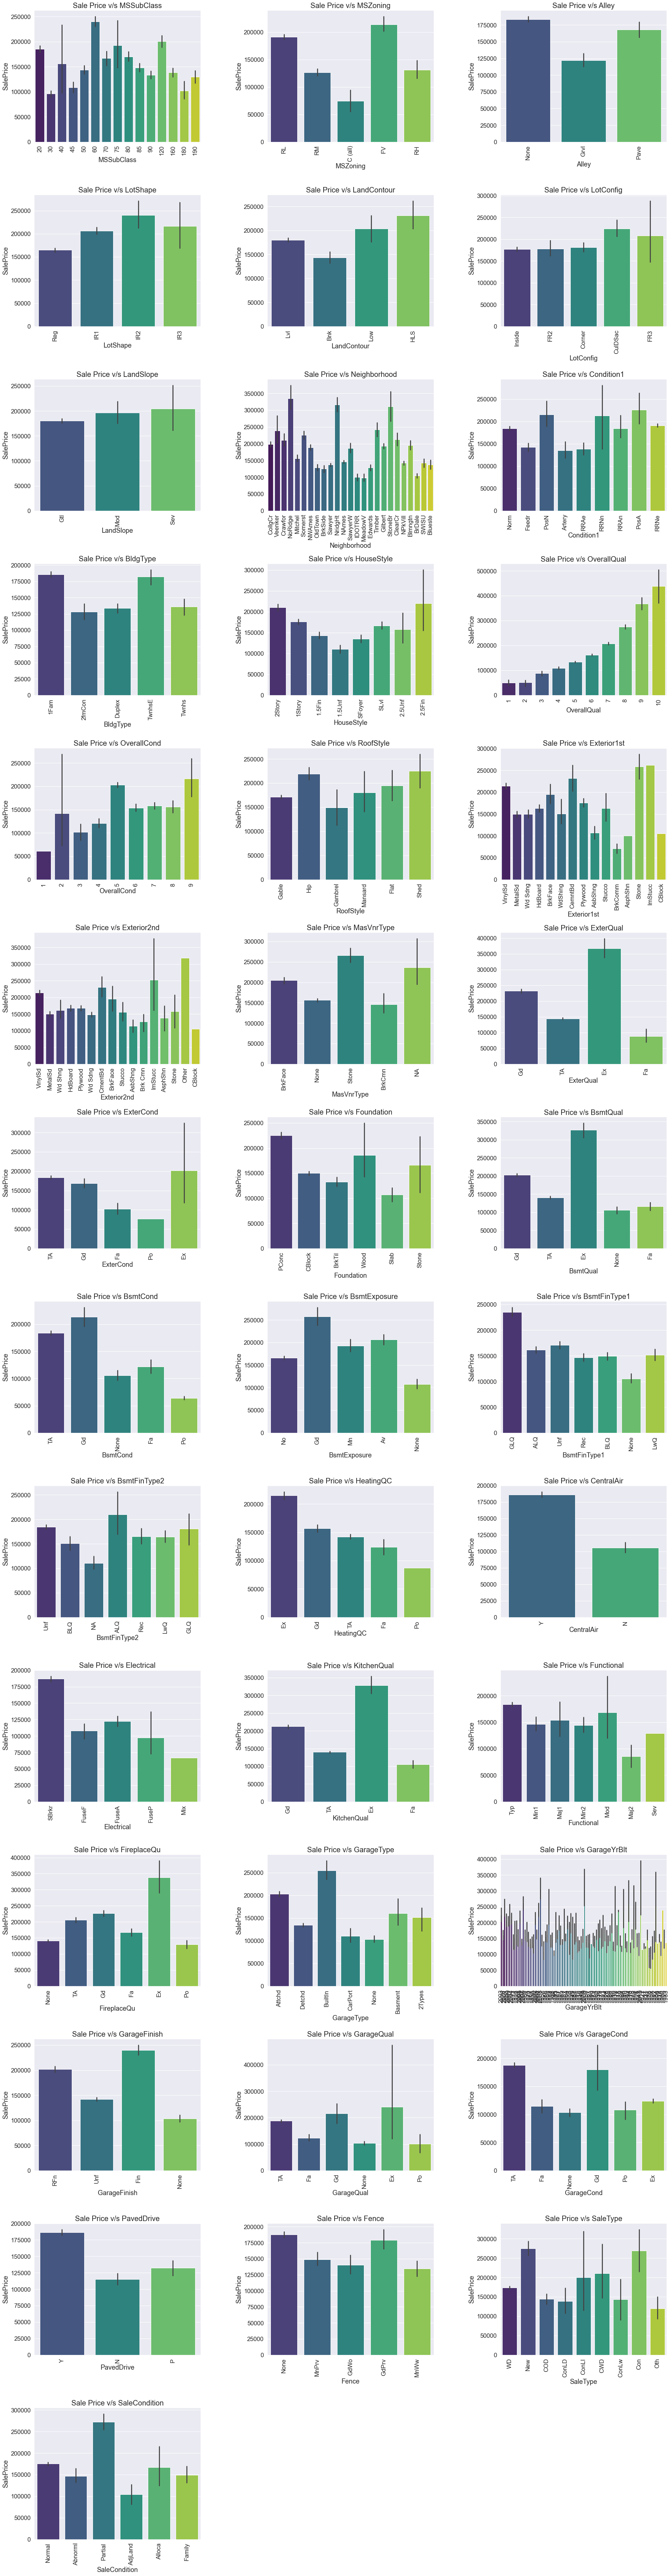

In [27]:
fig = plt.figure(figsize=(30,120))
sns.set(font_scale=1.5)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(len(df_objects.columns)):
    plt.subplot(14,3, i + 1)
    ax=sns.barplot(x=df_objects.columns[i], y='SalePrice', data=df,palette = 'viridis')
    ax.set_title('Sale Price v/s '+str(df_objects.columns[i]), fontsize=20)
    plt.xticks(rotation=90)
fig.show()

### Let's create a box plot to see how the categorical columns relate with the dependent variable

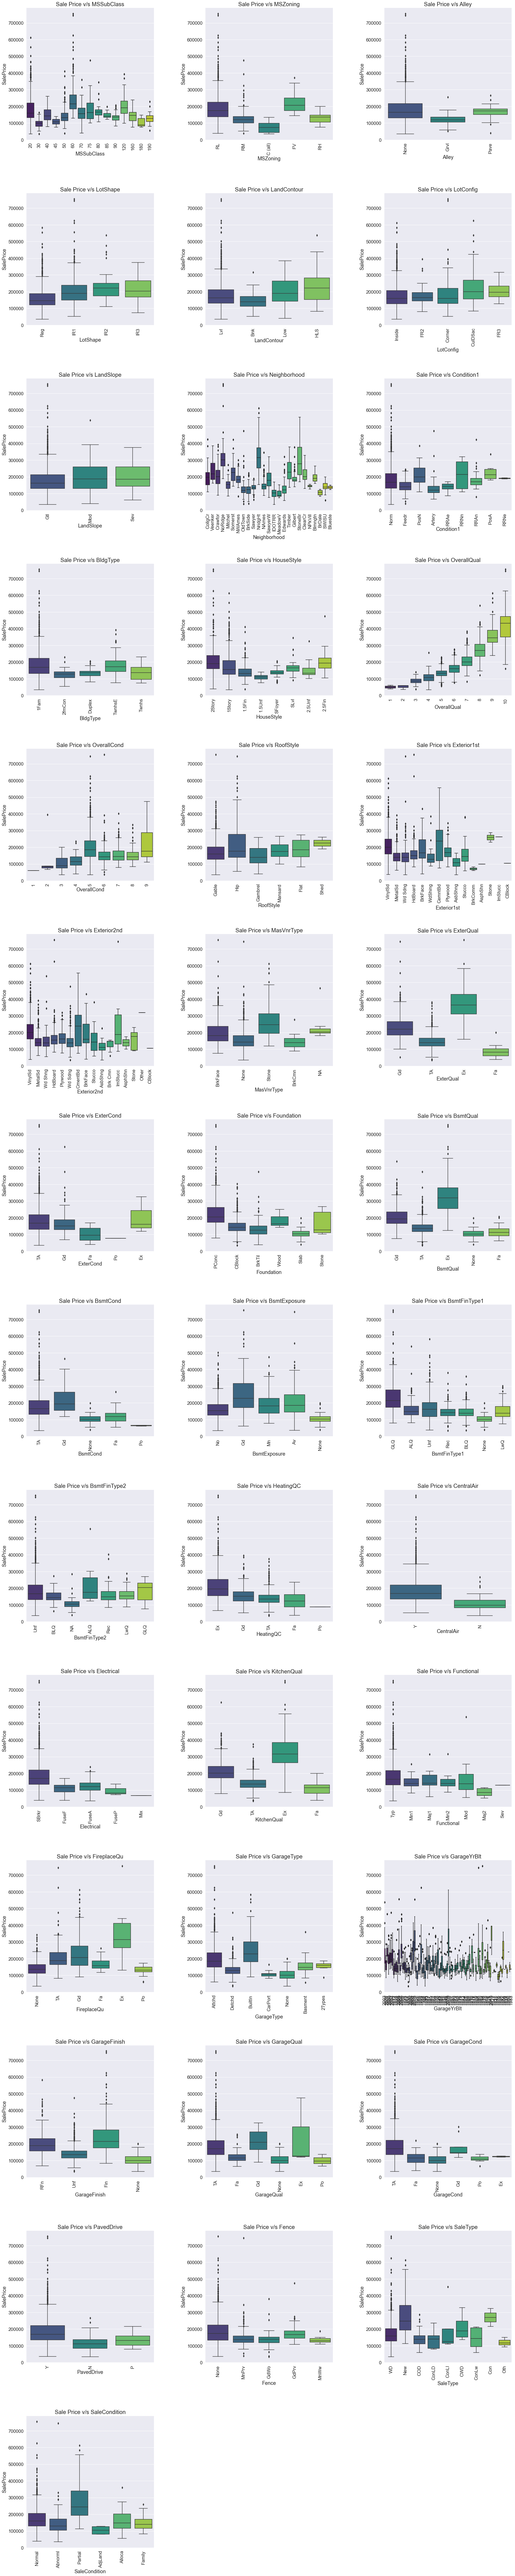

In [28]:
fig = plt.figure(figsize=(30,180))
sns.set(font_scale=1.5)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i in range(len(df_objects.columns)):
    plt.subplot(16,3, i + 1)
    ax=sns.boxplot(x=df_objects.columns[i], y='SalePrice', data=df,palette = 'viridis')
    ax.set_title('Sale Price v/s '+str(df_objects.columns[i]), fontsize=20)
    plt.xticks(rotation=90)
fig.show()

### Observations from Barplot & Boxplot.
- Buildings with paved area invite a higher cost price.
- SaleType-New buildings are priced higher.
- Excellent Basement Quality & excellent Kitchen quality invites higher price.
- Buildings with higher overall quality leads to higher price.
- Many outliers are noted in the data.

In [29]:
df_nums=df[num_columns]
df_nums.head()


Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0           0        150          856       856       854       1710   
1           0        284         1262      1262         0       1262   
2           0        434          920       920       866       1786   
3           0        540          756       961       756       1717   
4           0        490         1145      1145      1053       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
0             1             0         2         1             3             8   
1             0             1         2         0             3             6   
2             1             0         2         1             3             6   
3             1             0         1         0             3             7   
4             1             0         2         1             4             9   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           2         548           0           61              0   
1           1           2         460         298            0              0   
2           1           2         608           0           42              0   
3           1           3         642           0           35            272   
4           1           3         836         192           84              0   

   ScreenPorch  MoSold  YrSold  SalePrice  
0            0       2    2008     208500  
1            0       5    2007     181500  
2            0       9    2008     223500  
3            0       2    2006     140000  
4            0      12    2008     250000

In [30]:
df_nums=df_nums.drop(columns=["Id"])

### Let's create a scatterplot to see how the numerical columns relate to the dependent variable

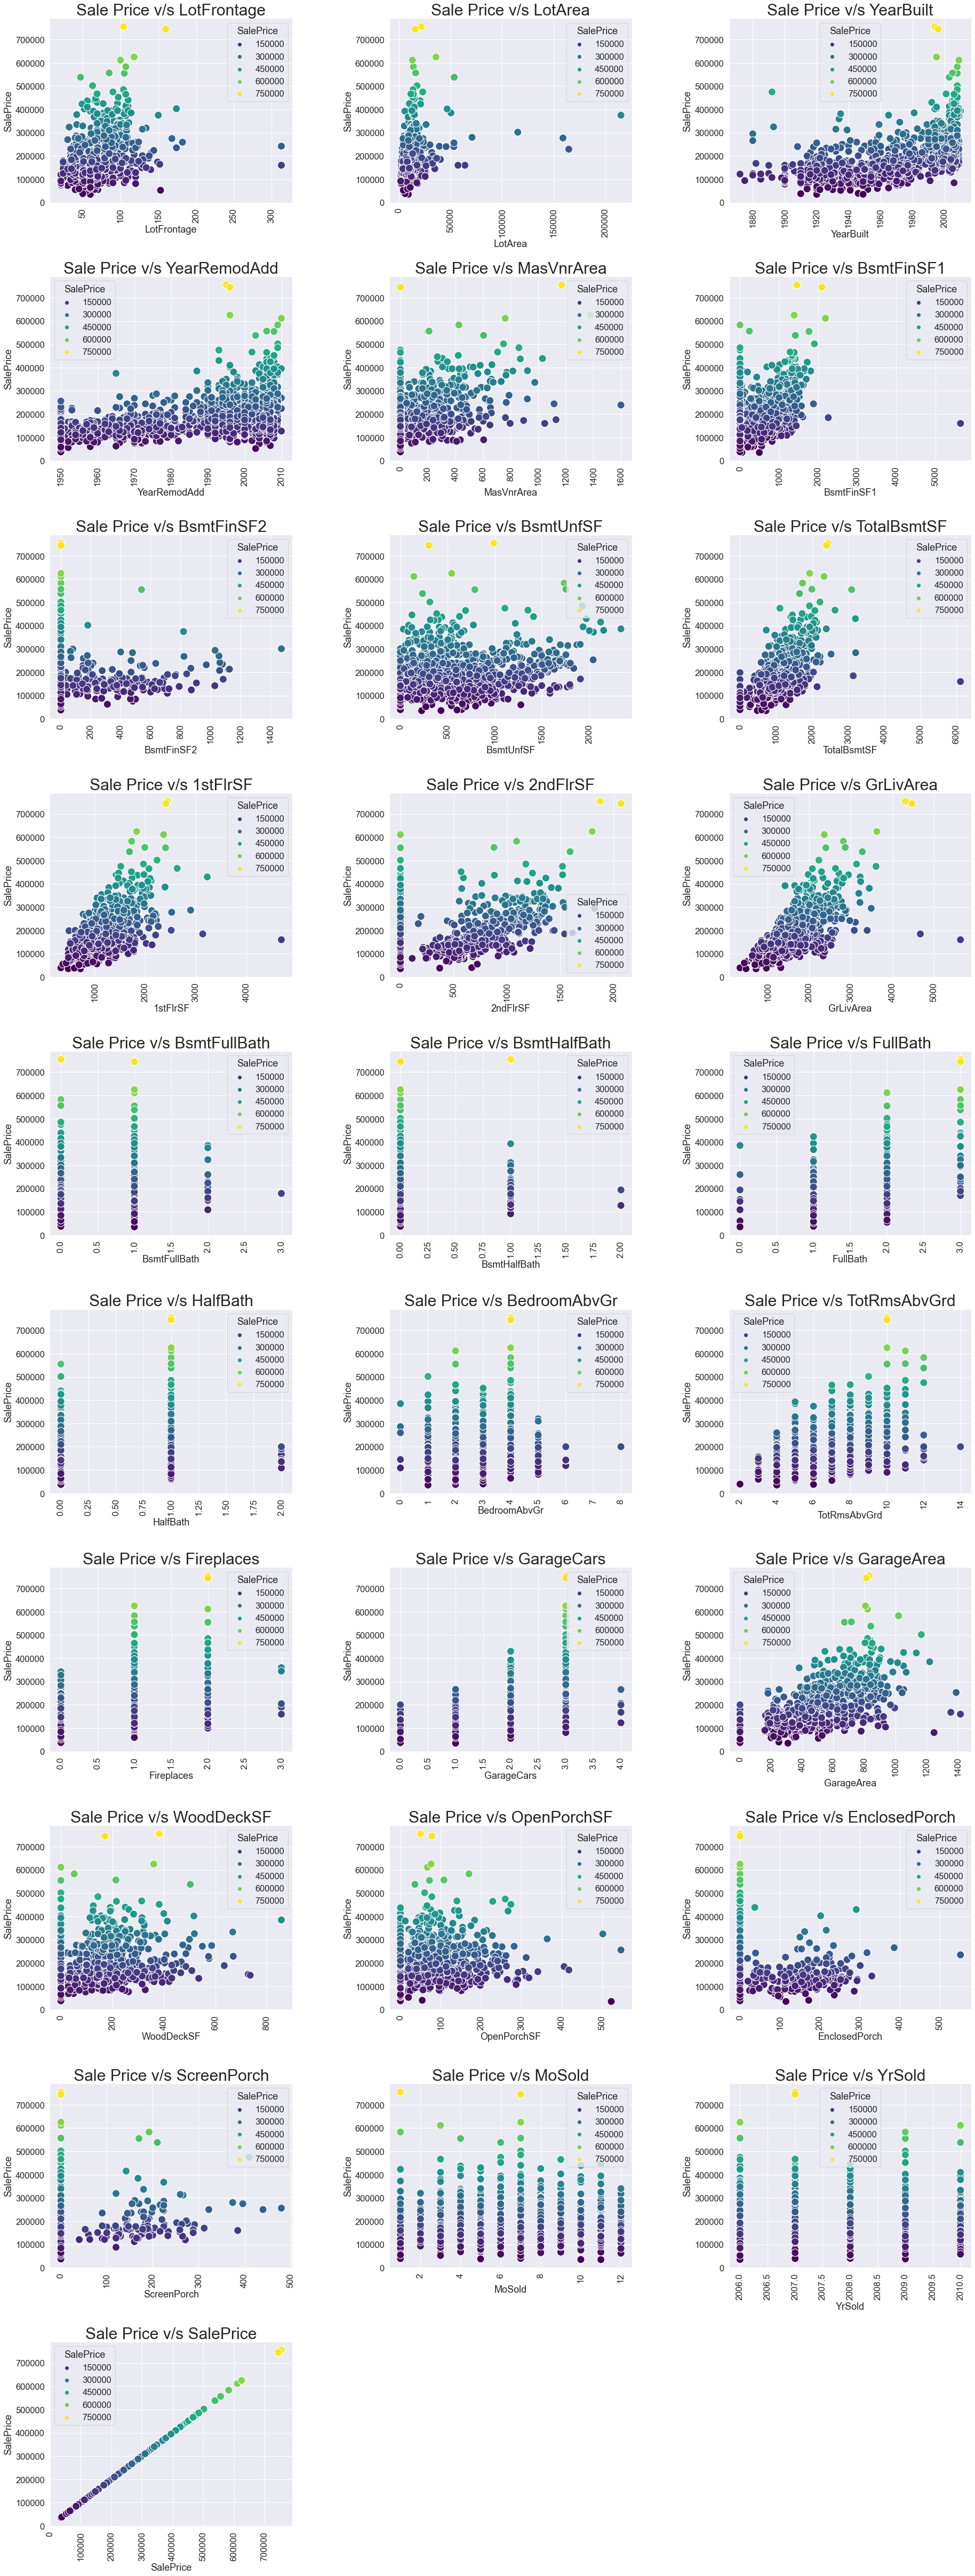

In [31]:
fig = plt.figure(figsize=(30,90))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
sns.set(font_scale=1.5)
for i in range(len(df_nums.columns)):
    plt.subplot(11,3, i + 1)
    ax=sns.scatterplot(x=df_nums.columns[i], y='SalePrice',hue="SalePrice", data=df,palette = 'viridis', s=200)
    ax.set_title('Sale Price v/s '+str(df_nums.columns[i]), fontsize=30)
    plt.xticks(rotation=90)
fig.show()

### Observations from Scatterplot:

- The Area of the building is positively related with the SalePrice.
- With increasing age of building the prices tend to fall hence the building age is negatively related to the saleprice.
- The sale price also increases  with increase in ground living area.

### Creating a correlation plot to see the correlations amongst the features.

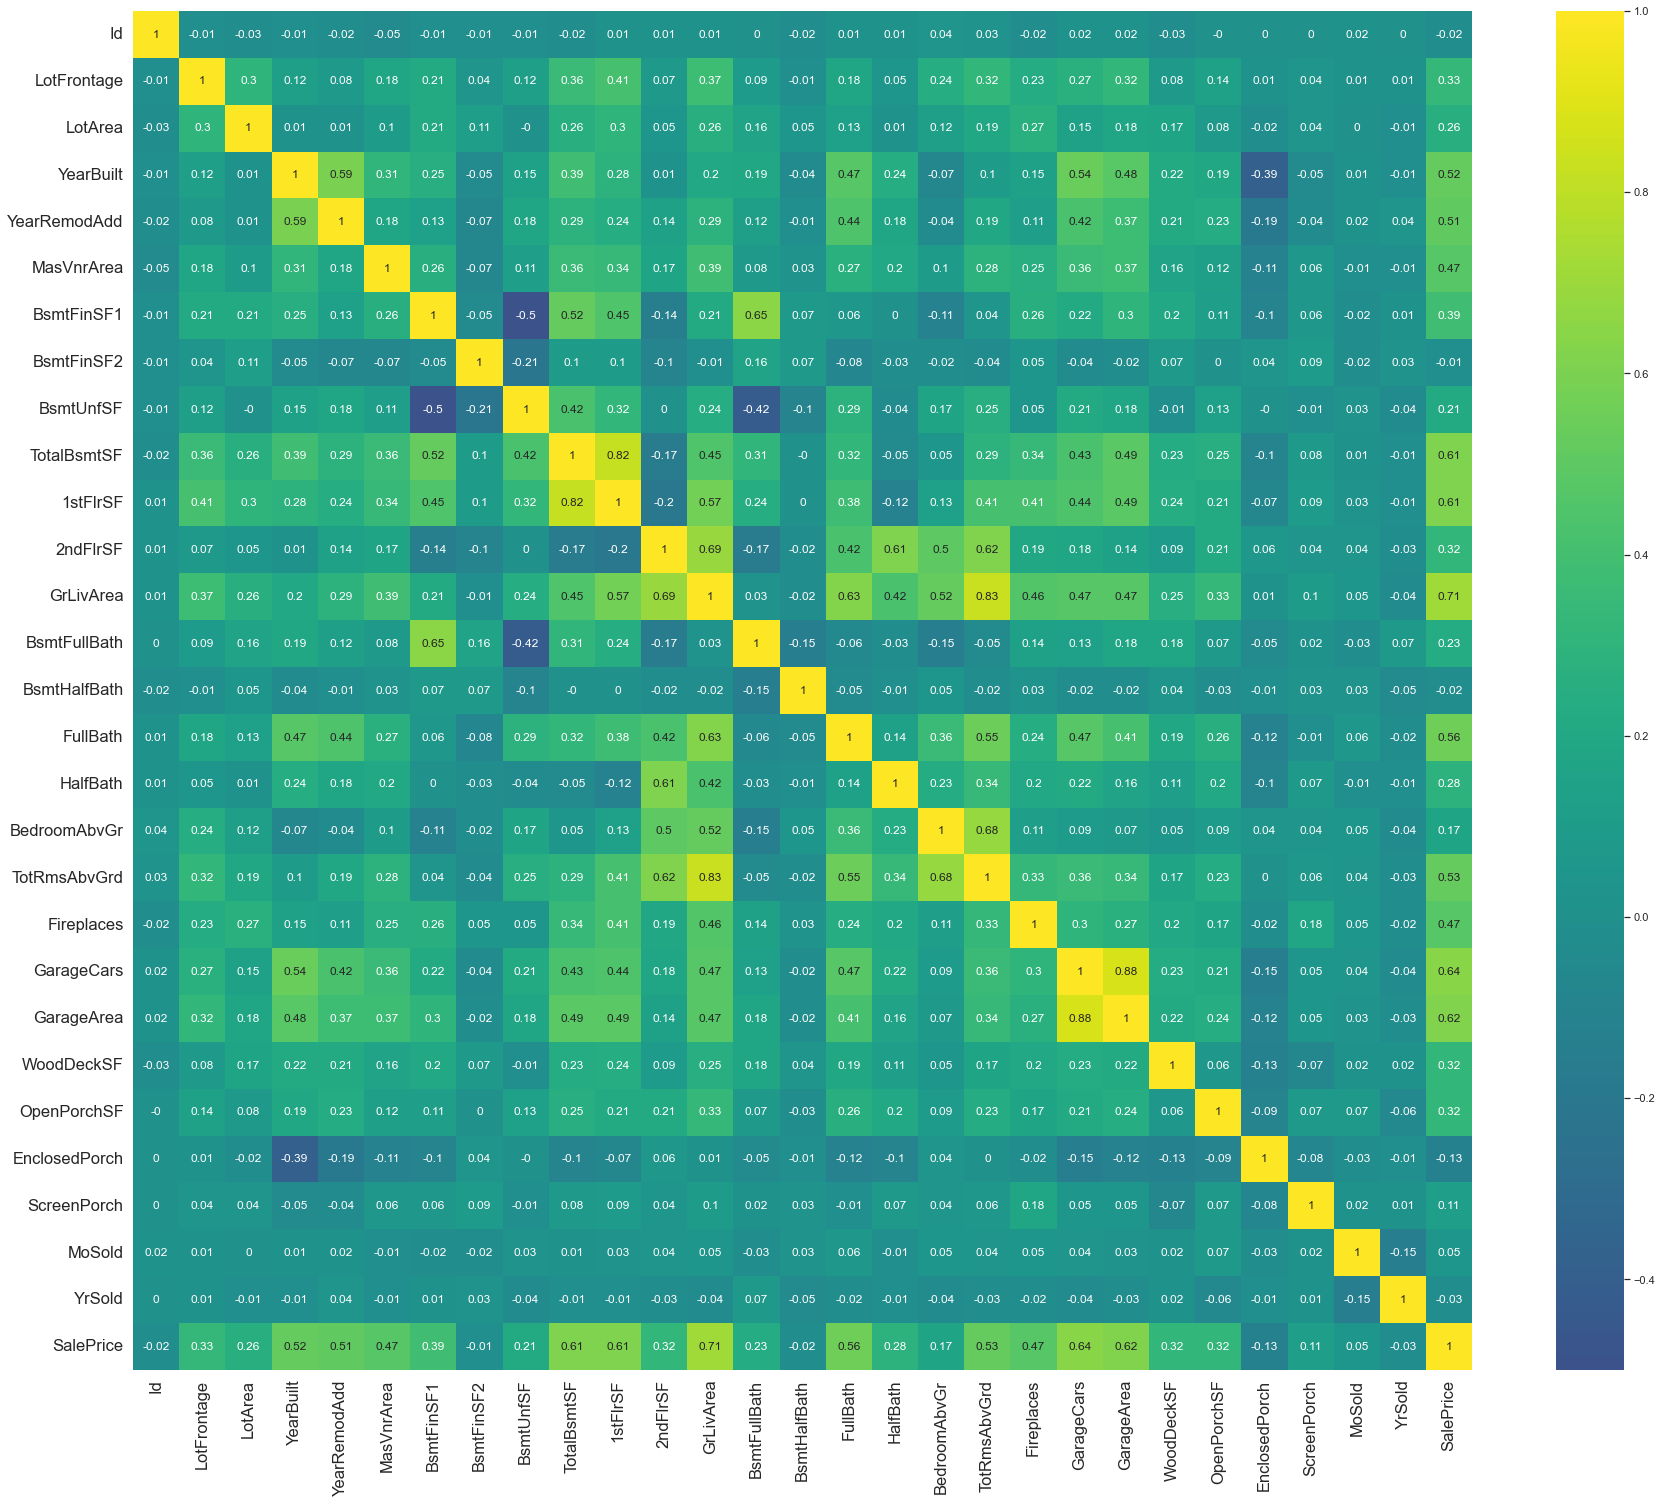

In [32]:
# Checking the correlation
plt.subplots(figsize = (30,25))
sns.set(font_scale=1)
#Plotting heatmap of numerical features
sns.heatmap(round(df[num_columns].corr(),2), cmap='viridis' , annot=True, center = 0)
plt.show()

## <font color = 'Blue'>Feature Engineering

### Let's create some business derived metrics

### Creating a new feature to check If house is remodelled

In [33]:
def Remodel(row):     ##Based on the difference between remodelled and built years
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0     #Indicate not Remodelled
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1     #Indicated Remodelled
    else:
        return 2    #Any other observation check
    
df['RemodelledStatus'] = df.apply(Remodel, axis=1)
df.head()    

Id MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1         60       RL         65.0     8450  None      Reg         Lvl   
1   2         20       RL         80.0     9600  None      Reg         Lvl   
2   3         60       RL         68.0    11250  None      IR1         Lvl   
3   4         70       RL         60.0     9550  None      IR1         Lvl   
4   5         60       RL         84.0    14260  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle OverallQual  \
0    Inside       Gtl      CollgCr       Norm     1Fam     2Story           7   
1       FR2       Gtl      Veenker      Feedr     1Fam     1Story           6   
2    Inside       Gtl      CollgCr       Norm     1Fam     2Story           7   
3    Corner       Gtl      Crawfor       Norm     1Fam     2Story           7   
4       FR2       Gtl      NoRidge       Norm     1Fam     2Story           8   

  OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd  \
0           5       2003          2003     Gable     VinylSd     VinylSd   
1           8       1976          1976     Gable     MetalSd     MetalSd   
2           5       2001          2002     Gable     VinylSd     VinylSd   
3           5       1915          1970     Gable     Wd Sdng     Wd Shng   
4           5       2000          2000     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0          856        Ex          Y      SBrkr       856       854       1710   
1         1262        Ex          Y      SBrkr      1262         0       1262   
2          920        Ex          Y      SBrkr       920       866       1786   
3          756        Gd          Y      SBrkr       961       756       1717   
4         1145        Ex          Y      SBrkr      1145      1053       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  \
0             1             0         2         1             3          Gd   
1             0             1         2         0             3          TA   
2             1             0         2         1             3          Gd   
3             1             0         1         0             3          Gd   
4             1             0         2         1             4          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageYrBlt  \
0             8        Typ           0        None     Attchd        2003   
1             6        Typ           1          TA     Attchd        1976   
2             6        Typ           1          TA     Attchd        2001   
3             7        Typ           1          Gd     Detchd        1998   
4             9        Typ           1          TA     Attchd        2000   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         548         TA         TA          Y   
1          RFn           2         460         TA         TA          Y   
2 

### Creating a new column to get the age of the House and Garage

In [34]:
df['CurrentYear'] = datetime.datetime.now().year
df["BuildingAge"] = df['CurrentYear'] - df['YearBuilt']
df["GarageAge"] = df['CurrentYear'] - df['GarageYrBlt'].apply(lambda x:   int(x) if x !="NA" else datetime.datetime.now().year)
df.drop(['CurrentYear', 'YearBuilt', 'GarageYrBlt'], axis = 1, inplace = True)

In [35]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1         60       RL         65.0     8450  None      Reg         Lvl   
1   2         20       RL         80.0     9600  None      Reg         Lvl   
2   3         60       RL         68.0    11250  None      IR1         Lvl   
3   4         70       RL         60.0     9550  None      IR1         Lvl   
4   5         60       RL         84.0    14260  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle OverallQual  \
0    Inside       Gtl      CollgCr       Norm     1Fam     2Story           7   
1       FR2       Gtl      Veenker      Feedr     1Fam     1Story           6   
2    Inside       Gtl      CollgCr       Norm     1Fam     2Story           7   
3    Corner       Gtl      Crawfor       Norm     1Fam     2Story           7   
4       FR2       Gtl      NoRidge       Norm     1Fam     2Story           8   

  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
0           5          2003     Gable     VinylSd     VinylSd    BrkFace   
1           8          1976     Gable     MetalSd     MetalSd       None   
2           5          2002     Gable     VinylSd     VinylSd    BrkFace   
3           5          1970     Gable     Wd Sdng     Wd Shng       None   
4           5          2000     Gable     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0        Ex          Y      SBrkr       856       854       1710   
1        Ex          Y      SBrkr      1262         0       1262   
2        Ex          Y      SBrkr       920       866       1786   
3        Gd          Y      SBrkr       961       756       1717   
4        Ex          Y      SBrkr      1145      1053       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr KitchenQual  \
0             1             0         2         1             3          Gd   
1             0             1         2         0             3          TA   
2             1             0         2         1             3          Gd   
3             1             0         1         0             3          Gd   
4             1             0         2         1             4          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0             8        Typ           0        None     Attchd          RFn   
1             6        Typ           1          TA     Attchd          RFn   
2             6        Typ           1          TA     Attchd          RFn   
3             7        Typ           1          Gd     Detchd          Unf   
4             9        Typ           1          TA     Attchd          RFn   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0           2         548         TA         TA          Y           0   
1           2         460         TA         TA          Y         298   
2           2         608         TA         TA          Y       

### Creating metrics for "Overall Area", "Total No. of Bathrooms", and "Total Porch Area".

In [36]:
df['TotalArea'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
df['BathroomNos'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
#Creating derived column for total porch area 
df['PorchArea'] = (df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
df.drop(['BsmtFinSF1','BsmtFinSF2','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','EnclosedPorch','ScreenPorch','WoodDeckSF'], axis = 1, inplace = True)

In [37]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1         60       RL         65.0     8450  None      Reg         Lvl   
1   2         20       RL         80.0     9600  None      Reg         Lvl   
2   3         60       RL         68.0    11250  None      IR1         Lvl   
3   4         70       RL         60.0     9550  None      IR1         Lvl   
4   5         60       RL         84.0    14260  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle OverallQual  \
0    Inside       Gtl      CollgCr       Norm     1Fam     2Story           7   
1       FR2       Gtl      Veenker      Feedr     1Fam     1Story           6   
2    Inside       Gtl      CollgCr       Norm     1Fam     2Story           7   
3    Corner       Gtl      Crawfor       Norm     1Fam     2Story           7   
4       FR2       Gtl      NoRidge       Norm     1Fam     2Story           8   

  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
0           5          2003     Gable     VinylSd     VinylSd    BrkFace   
1           8          1976     Gable     MetalSd     MetalSd       None   
2           5          2002     Gable     VinylSd     VinylSd    BrkFace   
3           5          1970     Gable     Wd Sdng     Wd Shng       None   
4           5          2000     Gable     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir  \
0          GLQ          Unf        150          856        Ex          Y   
1          ALQ          Unf        284         1262        Ex          Y   
2          GLQ          Unf        434          920        Ex          Y   
3          ALQ          Unf        540          756        Gd          Y   
4          GLQ          Unf        490         1145        Ex          Y   

  Electrical  GrLivArea  BedroomAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0      SBrkr       1710             3          Gd             8        Typ   
1      SBrkr       1262             3          TA             6        Typ   
2      SBrkr       1786             3          Gd             6        Typ   
3      SBrkr       1717             3          Gd             7        Typ   
4      SBrkr       2198             4          Gd             9        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  \
0           0        None     Attchd          RFn           2         548   
1           1          TA     Attchd          RFn           2         460   
2           1          TA     Attchd          RFn           2         608   
3           1          Gd     Detchd          Unf           3         642   
4           1          TA     Attchd          RFn           3         836   

  GarageQual GarageCond PavedDrive Fence  MoSold  YrSold SaleType  \
0         TA         TA          Y  None       2    2008       WD   
1         TA         TA          Y  None       5    2007       WD   
2         TA         TA          Y  None       9    2008       WD   
3         TA         TA          Y  None       2    2006       WD   
4         TA         TA          Y  None      12    2008       WD   

  SaleCondition  SalePrice  RemodelledStatus  BuildingAge  GarageAge  \
0        Normal     208500                 0           19         19   
1        Normal     181500                 0           46         46   
2        Normal     223500                 1           21         21   
3       Abnorml     140

### Outlier Treatment

In [38]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1])

Id  LotFrontage        LotArea  YearRemodAdd   MasVnrArea  \
count  1460.000000  1460.000000    1460.000000   1460.000000  1460.000000   
mean    730.500000    69.863699   10516.828082   1984.865753   103.117123   
std     421.610009    22.027677    9981.264932     20.645407   180.731373   
min       1.000000    21.000000    1300.000000   1950.000000     0.000000   
10%     146.900000    49.000000    5000.000000   1950.000000     0.000000   
25%     365.750000    60.000000    7553.500000   1967.000000     0.000000   
50%     730.500000    69.000000    9478.500000   1994.000000     0.000000   
75%    1095.250000    79.000000   11601.500000   2004.000000   164.250000   
95%    1387.050000   104.000000   17401.150000   2007.000000   456.000000   
98%    1430.820000   120.820000   25251.620000   2008.000000   650.820000   
99%    1445.410000   137.410000   37567.640000   2009.000000   791.280000   
100%   1460.000000   313.000000  215245.000000   2010.000000  1600.000000   
max    1460.000000   313.000000  215245.000000   2010.000000  1600.000000   

         BsmtUnfSF  TotalBsmtSF    GrLivArea  BedroomAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean    567.240411  1057.429452  1515.463699      2.866438      6.517808   
std     441.866955   438.705324   525.480383      0.815778      1.625393   
min       0.000000     0.000000   334.000000      0.000000      2.000000   
10%      74.900000   636.900000   912.000000      2.000000      5.000000   
25%     223.000000   795.750000  1129.500000      2.000000      5.000000   
50%     477.500000   991.500000  1464.000000      3.000000      6.000000   
75%     808.000000  1298.250000  1776.750000      3.000000      7.000000   
95%    1468.000000  1753.000000  2466.100000      4.000000     10.000000   
98%    1678.200000  2001.640000  2782.380000      4.000000     10.820000   
99%    1797.050000  2155.050000  3123.480000      5.000000     11.000000   
100%   2336.000000  6110.000000  5642.000000      8.000000     14.000000   
max    2336.000000  6110.000000  5642.000000      8.000000     14.000000   

        Fireplaces   GarageCars   GarageArea       MoSold       YrSold  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014     1.767123   472.980137     6.321918  2007.815753   
std       0.644666     0.747315   213.804841     2.703626     1.328095   
min       0.000000     0.000000     0.000000     1.000000  2006.000000   
10%       0.000000     1.000000   240.000000     3.000000  2006.000000   
25%       0.000000     1.000000   334.500000     5.000000  2007.000000   
50%       1.000000     2.000000   480.000000     6.000000  2008.000000   
75%       1.000000     2.000000   576.000000     8.000000  2009.000000   
95%       2.000000     3.000000   850.100000    11.000000  2010.000000   
98%       2.000000     3.000000   907.460000    12.000000  2010.000000   
99%       2.000000     3.000000  1002.790000    12.000000  2010.000000   
100%      3.000000     4.000000  1418.000000    12.000000  2010.000000   
max       3.000000     4.000000  1418.000000    12.000000  2010.000000   

           SalePrice  RemodelledStatus  BuildingAge    GarageAge  \
count    1460.000000       1460.000000  1460.000000  1460.000000   
mean   180921.195890          0.476712    50.732192    41.080822   
std     79442.502883          0.499629    30.202904    25.979541   
min     34900.000000          0.000000    12.000000     0.000000   
10%    106475.000000          0.000000    16.000000    15.000000   
25%    129975.000000          0.000000    22.000000    19.000000   
50%    163000.000000          0.000000    49.000000    37.500000   
75%    214000.000000          1.000000    68.000000    60.000000   
95%    326100.000000          1.000000   106.000000    92.000000   
98%    394931.060000          1.000000   113.640000   102.000000   
99%    442567.010000          1.000000   122.820000   104.820000   
100%   755000.00000

**On keen observation, it is seen that columns- "LotFrontage","LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF","GrLivArea","GarageArea" 
have a huge difference in the 99th & 100th percentile, hence we prefer to keep data upto 99th percentile.**

In [39]:
outlier_list = ["LotFrontage","LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF","GrLivArea","GarageArea"]
for out in outlier_list:
    outlier = df[out].quantile(0.99)
    df = df[df[out] < outlier]

In [40]:
df.shape

(1357, 61)

In [41]:
retained_data = round(100*(len(df)/total_records),2)
print(f"The data retained after removing the outliers is {retained_data}% of the original set")

The data retained after removing the outliers is 92.95% of the original set


### Dummies for Categorical Columns.

In [42]:
object_columns = []
for obj in df.columns:
    if df[obj].dtype == np.object:
        object_columns.append(obj)
print(object_columns)

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']


In [43]:
df_dummy = pd.get_dummies(df[object_columns], drop_first=True)

In [44]:
df = pd.concat([df, df_dummy], axis=1) #concatinating dummy columns with original dataframe
df.shape

(1357, 288)

In [45]:
df = df.drop(object_columns, axis = 1) #dropping the redundant object columns
df.shape

(1357, 249)

In [46]:
df.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtUnfSF  TotalBsmtSF  \
0   1         65.0     8450          2003       196.0        150          856   
1   2         80.0     9600          1976         0.0        284         1262   
2   3         68.0    11250          2002       162.0        434          920   
3   4         60.0     9550          1970         0.0        540          756   
4   5         84.0    14260          2000       350.0        490         1145   

   GrLivArea  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
0       1710             3             8           0           2         548   
1       1262             3             6           1           2         460   
2       1786             3             6           1           2         608   
3       1717             3             7           1           3         642   
4       2198             4             9           1           3         836   

   MoSold  YrSold  SalePrice  RemodelledStatus  BuildingAge  GarageAge  \
0       2    2008     208500                 0           19         19   
1       5    2007     181500                 0           46         46   
2       9    2008     223500                 1           21         21   
3       2    2006     140000                 1          107         24   
4      12    2008     250000                 0           22         22   

   TotalArea  BathroomNos  PorchArea  MSSubClass_30  MSSubClass_40  \
0       2416          3.5         61              0              0   
1       2240          2.5        298              0              0   
2       2272          3.5         42              0              0   
3       1933          2.0        307              0              0   
4       2853          3.5        276              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   
3              0              0              0              1              0   
4              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0               0   
1              0              0              0               0   
2              0              0              0               0   
3              0              0              0               0   
4              0              0              0               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  \
0               0               0               0            0            0   
1               0               0               0            0            0   
2               0               0               0            0            0   
3               0               0               0            0            0   
4               0               0               0            0            0   

   MSZoning_RL  MSZoning_RM  Alley_None  Alley_Pave  LotShape_IR2  \
0            1            0           1           0             0   
1            1            0           1           0             0   
2            1            0           1           0             0   
3            1            0           1           0             0   
4            1            0           1           0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

## <font color = 'Blue'> Model Building

### Train-Test Split

In [47]:
df_train, df_test = train_test_split(df, test_size=0.30, random_state=42)

In [48]:
print(f"Test size : {df_test.shape}")
print(f"Train size : {df_train.shape}")

Test size : (408, 249)
Train size : (949, 249)


In [49]:
scaler = MinMaxScaler()

In [50]:
#Gathering the numerical columns again
numerical_columns = []
for obj in df.columns:
    if df[obj].dtype != np.object:
        numerical_columns.append(obj)

In [51]:
#Applying fit-transform on the train set
df_train[numerical_columns]=scaler.fit_transform(df_train[numerical_columns])
df_train.head()

Id  LotFrontage   LotArea  YearRemodAdd  MasVnrArea  BsmtUnfSF  \
355   0.243484     0.724138  0.347151      0.750000    0.000000   0.182127   
1115  0.764746     0.620690  0.376322      0.950000    0.487370   0.412896   
343   0.235254     0.362069  0.263408      0.916667    0.915305   0.936652   
1123  0.770233     0.250000  0.282808      0.966667    0.000000   0.394796   
87    0.059671     0.163793  0.092501      0.983333    0.112927   0.346154   

      TotalBsmtSF  GrLivArea  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  \
355      0.607287   0.349758      0.500000           0.4    0.000000   
1115     0.877530   0.565428      0.500000           0.5    0.333333   
343      0.852227   0.545234      0.333333           0.4    0.333333   
1123     0.353239   0.147011      0.333333           0.2    0.000000   
87       0.309717   0.359451      0.333333           0.2    0.000000   

      GarageCars  GarageArea    MoSold  YrSold  SalePrice  RemodelledStatus  \
355         0.50    0.561422  0.636364    0.25   0.346001               0.0   
1115        0.75    1.000000  0.909091    0.25   0.687891               0.0   
343         0.50    0.607759  0.545455    0.50   0.561355               0.0   
1123        0.00    0.000000  0.454545    0.75   0.201214               1.0   
87          0.50    0.568966  0.454545    0.75   0.314367               0.0   

      BuildingAge  GarageAge  TotalArea  BathroomNos  PorchArea  \
355      0.102190   0.221311   0.447409          0.4   0.025316   
1115     0.014599   0.122951   0.616727          0.4   0.000000   
343      0.029197   0.139344   0.353515          0.2   0.552093   
1123     0.452555   0.000000   0.093381          0.1   0.194742   
87       0.000000   0.106557   0.228322          0.3   0.227848   

      MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
355             0.0            0.0            0.0            0.0   
1115            0.0            0.0            0.0            0.0   
343             0.0            0.0            0.0            0.0   
1123            0.0            0.0            0.0            0.0   
87              0.0            0.0            0.0            0.0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
355             0.0            0.0            0.0            0.0   
1115            0.0            0.0            0.0            0.0   
343             0.0            0.0            0.0            0.0   
1123            0.0            0.0            0.0            0.0   
87              0.0            0.0            0.0            0.0   

      MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
355             0.0            0.0             0.0             0.0   
1115            0.0            0.0             0.0             0.0   
343             0.0            0.0             1.0             0.0   
1123            0.0            0.0             0.0             0.0   
87              0.0            0.0             0.0             1.0   

      MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
355              0.0             0.0          0.0          0.0          1.0   
1115             0.0             0.0          0.0          0.0          1.0   
343              0.0             0.0          0.0          0.0          1.0   
1123             0.0             0.0          0.0          0.0          1.0   
87               0.0             0.0          1.0          0.0          0.0   

      MSZoning_RM  Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  \
355           0.0         1.0         0.0           1.0           0.0   
1115          0.0         1.0         0.0           0.0           0.0   
343           0.0         1.0         0.0           0.0           0.0   
1123          0.0         1.0         0.0           0.0           0.0   
87            0.0         0.0         1.0           0.0           0.0   

      LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
355   

In [52]:
#splitting X_train & y_train
y_train = df_train.pop("SalePrice")
X_train = df_train

In [53]:
#Applying fit-transform on the test set
df_test[numerical_columns]=scaler.transform(df_test[numerical_columns])

In [54]:
#splitting X_test & y_test
y_test = df_test.pop("SalePrice")
X_test = df_test

### Recursive Feature Elimination

In [55]:
#Running RFE with the output number of the variable equal to 100
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 100)             # running RFE to select top 100 features
rfe = rfe.fit(X_train, y_train)

In [56]:
#Zipping features, rfe.support_ and rfe.ranking_
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('Id', False, 98),
 ('LotFrontage', False, 105),
 ('LotArea', True, 1),
 ('YearRemodAdd', False, 142),
 ('MasVnrArea', False, 74),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', False, 104),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 89),
 ('Fireplaces', False, 24),
 ('GarageCars', True, 1),
 ('GarageArea', False, 23),
 ('MoSold', False, 133),
 ('YrSold', False, 115),
 ('RemodelledStatus', False, 128),
 ('BuildingAge', True, 1),
 ('GarageAge', False, 51),
 ('TotalArea', True, 1),
 ('BathroomNos', True, 1),
 ('PorchArea', True, 1),
 ('MSSubClass_30', False, 65),
 ('MSSubClass_40', False, 136),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 113),
 ('MSSubClass_60', False, 90),
 ('MSSubClass_70', False, 75),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 117),
 ('MSSubClass_85', True, 1),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', True, 1),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', True, 1),
 ('MSSubClass_190', True, 1),
 ('MSZo

In [57]:
#Gathering columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['LotArea', 'BsmtUnfSF', 'GrLivArea', 'BedroomAbvGr', 'GarageCars',
       'BuildingAge', 'TotalArea', 'BathroomNos', 'PorchArea', 'MSSubClass_45',
       'MSSubClass_75', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotShape_IR3',
       'LotConfig_FR3', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_RRAe', 'BldgType_2fmCon', 'BldgType_Duplex',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'OverallQual_2', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'Exterior1st

In [58]:
##Let's Assign top 100 columns to X_train_rfe

X_train_rfe = X_train[col_rfe_sup]

In [59]:
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

### Applying Variance Inflation Factor for Multicollinearity Reduction

In [60]:
#VIF codeblock
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)


In [61]:
#Gathering high VIF features. 
#Since number of features is high we would be clubbing all features with  VIF>10 and eliminating them together.
high_vif = vif[vif['VIF']>10] 
high_vif

Features      VIF
16       MSSubClass_190      inf
90        GarageCond_Gd      inf
72    BsmtFinType1_None      inf
29      BldgType_Duplex      inf
28      BldgType_2fmCon      inf
59  Exterior2nd_CmentBd      inf
82      GarageType_None      inf
83    GarageFinish_None      inf
84        GarageQual_Fa      inf
85        GarageQual_Gd      inf
86      GarageQual_None      inf
87        GarageQual_Po      inf
88        GarageQual_TA      inf
89        GarageCond_Fa      inf
73      BsmtFinType2_NA      inf
67        BsmtQual_None      inf
91      GarageCond_None      inf
12        MSSubClass_90      inf
92        GarageCond_Po      inf
93        GarageCond_TA      inf
53  Exterior1st_CemntBd      inf
69        BsmtCond_None      inf
40        OverallCond_5  1136.50
41        OverallCond_6   365.08
42        OverallCond_7   303.71
77    GarageType_Attchd   178.13
81    GarageType_Detchd   145.18
43        OverallCond_8   102.77
39        OverallCond_4    66.08
79   GarageType_BuiltIn    39.47
44        OverallCond_9    36.01
38        OverallCond_3    35.63
45      RoofStyle_Gable    30.59
47        RoofStyle_Hip    29.12
68          BsmtQual_TA    11.34

In [62]:
X_train = X_train.drop(high_vif.Features,axis=1)  #dropping high VIF Features from X_train
X_test = X_test.drop(high_vif.Features,axis=1) #dropping high VIF Features from X_test

## <font color = 'Red'>Ridge Regression


In [63]:
#selecting alpha parameters for cross validation
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

In [64]:
ridge = Ridge()

In [65]:
folds = 5

**Grid Search CV for Ridge Regression**

In [66]:
ridge_model_CV = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', 
                        cv = folds, return_train_score=True, verbose = 1) 

In [67]:
ridge_model_CV.fit(X_train, y_train)  #performing ridge regression on train set

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
ridge_CV_results = pd.DataFrame(ridge_model_CV.cv_results_) #creating dataframe to check the Ridge results
ridge_CV_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
12         1.0         -0.035748        -0.038347                1
11         0.9         -0.035703        -0.038354                2
10         0.8         -0.035657        -0.038364                3
9          0.7         -0.035608        -0.038388                4
8          0.6         -0.035557        -0.038427                5
13         2.0         -0.036165        -0.038453                6
7          0.5         -0.035507        -0.038475                7
6          0.4         -0.035458        -0.038532                8
5          0.3         -0.035409        -0.038601                9
14         3.0         -0.036579        -0.038663               10
4          0.2         -0.035356        -0.038684               11
3          0.1         -0.035292        -0.038790               12
2         0.01         -0.035228        -0.038914               13
1        0.001         -0.035221        -0.038929               14
0       0.0001         -0.035221        -0.038930               15
15         4.0         -0.036991        -0.038939               16
16         5.0         -0.037384        -0.039214               17
17         6.0         -0.037754        -0.039485               18
18         7.0         -0.038118        -0.039762               19
19         8.0         -0.038475        -0.040052               20
20         9.0         -0.038836        -0.040362               21
21        10.0         -0.039200        -0.040690               22
22          11         -0.039562        -0.041023               23
23          12         -0.039924        -0.041364               24
24          13         -0.040288        -0.041704               25
25          14         -0.040654        -0.042040               26
26          15         -0.041019        -0.042388               27
27          16         -0.041380        -0.042737               28
28          17         -0.041737        -0.043087               29
29          18         -0.042091        -0.043431               30
30          19         -0.042443        -0.043776               31
31          20         -0.042795        -0.044118               32
32          50         -0.052528        -0.053591               33
33         100         -0.064090        -0.064959               34
34         500         -0.092900        -0.093229               35
35        1000         -0.102295        -0.102509               36

In [69]:
#getting the best parameters
ridge_model_CV.best_params_

{'alpha': 1.0}

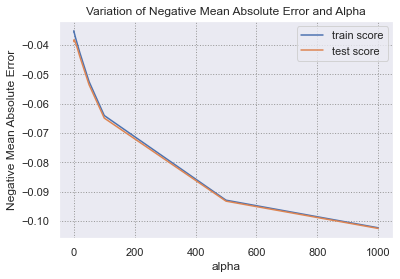

In [70]:
# plotting mean train and test scores with alpha 
ridge_CV_results['param_alpha'] = ridge_CV_results['param_alpha'].astype('int32')

# plotting the results
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(ridge_CV_results['param_alpha'], ridge_CV_results['mean_train_score'])
plt.plot(ridge_CV_results['param_alpha'], ridge_CV_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Variation of Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [71]:
X_train.shape

(949, 65)

In [72]:
ridge = Ridge(alpha=1)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  0.0408194656591534
Coefficients:
 [ 0.05294591  0.06363969  0.18941123 -0.08063397  0.06593895 -0.17621724
  0.26253805  0.05545015  0.08196483  0.02503272  0.03291531  0.02776248
 -0.03734094 -0.05890724 -0.04197149 -0.03850661  0.02729605  0.02834033
  0.09140227 -0.02857336  0.03132666  0.0438634   0.06692091  0.03621099
  0.07965578 -0.04944891 -0.04362808 -0.03344826 -0.00348586 -0.0093179
  0.07215313  0.150039    0.12990324 -0.03271426  0.04108293  0.03109953
  0.         -0.04583007  0.04499726  0.          0.00874169  0.0304751
  0.01677226  0.01066201  0.         -0.03983039 -0.02280654  0.00363218
 -0.009698   -0.03844121  0.00040815 -0.0090449   0.          0.03862421
  0.         -0.05868208  0.03920023  0.00796668 -0.05155911  0.03598932
  0.01798582  0.09271612 -0.00060128  0.01937949  0.03542647]


In [73]:
#Making predictions for train and test sets obtained in Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

In [74]:
#Figuring out R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

In [75]:
#Checking the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

In [76]:
#Checking the Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

In [77]:
#Checking the Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)

In [78]:
print("For Ridge Regression Model (Original Model, alpha=1.0):\n","="*80)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train.round(4),"\nMSE score:",MSE_ridge_train.round(4),"\nMAE score:",MAE_ridge_train.round(4),\
     "\nRMSE score:",RMSE_ridge_train.round(4),"\n","="*80)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test.round(4),"\nMSE score:",MSE_ridge_test.round(4),"\nMAE score:",MAE_ridge_test.round(4),\
      "\nRMSE score:",RMSE_ridge_test.round(4),"\n","="*80)

For Ridge Regression Model (Original Model, alpha=1.0):

For Train Set:
R2 score: 0.9055 
MSE score: 0.0022 
MAE score: 0.0359 
RMSE score: 0.0474 

For Test Set:
R2 score: 0.8926 
MSE score: 0.0028 
MAE score: 0.0403 
RMSE score: 0.0532 


**Creating a dataframe of features and coefficients**

In [79]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and resetting index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  
ridge_df.head(10)

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0             TotalArea       0.2625                            0.2625
1             GrLivArea       0.1894                            0.1894
2           BuildingAge      -0.1762                            0.1762
3         OverallQual_9       0.1500                            0.1500
4        OverallQual_10       0.1299                            0.1299
5          SaleType_New       0.0927                            0.0927
6  Neighborhood_Crawfor       0.0914                            0.0914
7             PorchArea       0.0820                            0.0820
8          BedroomAbvGr      -0.0806                            0.0806
9  Neighborhood_StoneBr       0.0797                            0.0797

**Selection of Top 10 Features from Ridge Regression**

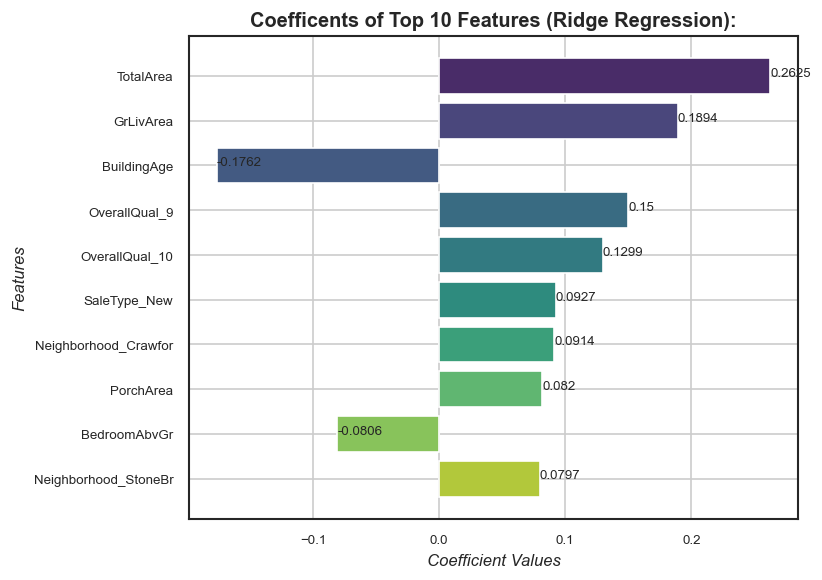

In [80]:
ridge_top10= ridge_df.loc[:9] #Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(7,5), dpi=120)
ax= sns.barplot(y=ridge_top10['Features'], x=ridge_top10['Coefficient'], palette='viridis')

plt.xlabel('Coefficient Values', fontsize= 10, fontstyle='italic')
plt.ylabel('Features' , fontsize= 10, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):', fontsize=12,fontweight='bold')

coef= ridge_top10['Coefficient'] 
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=8)

plt.grid(True)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.autoscale()
plt.tight_layout()
plt.show()

## <font color = 'Green'> Ridge Model Evaluation

## <font color = 'Blue'> Training Performance Evaluation

### Histogram for Error terms

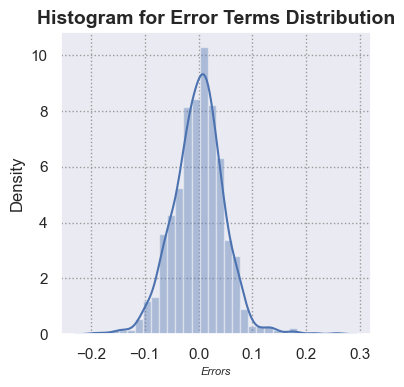

In [81]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(4,4), dpi=100)
res = (y_train - y_pred_train_r)     #plotting residuals
sns.distplot(res , bins = 30, color='b')
plt.title('Histogram for Error Terms Distribution', fontweight='bold', fontsize = 14)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 8) 
plt.grid(True)
plt.show()

**Hence the Error terms in Train Set are normally distributed around the mean 0**

### Residuals Relationship

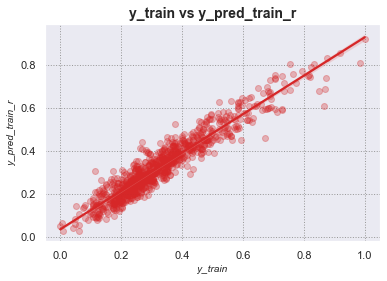

In [82]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize = (6,4))
sns.regplot(y_train,y_pred_train_r, color='#d62728',scatter_kws={'alpha':0.3})
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 14)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 10)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 10) 
plt.grid(True)
plt.show()

**Hence there is a linear relationship amongst the terms.**

## <font color = 'Blue'> Test Performance Evaluation

### Histogram for Error terms

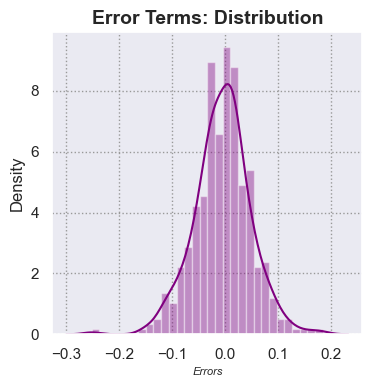

In [83]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(4,4), dpi=100)
res = (y_test - y_pred_test_r)     #residuals
sns.distplot(res , bins = 30, color='purple')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 14)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 8) 
plt.grid(True)
plt.show()

**Hence the Error terms in Test Set are also normally distributed around the mean 0**

### Residual Relationship

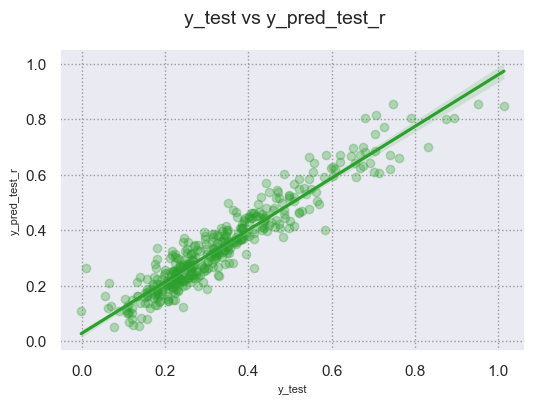

In [84]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig = plt.figure(figsize=(6,4), dpi=100)
sns.regplot(y_test,y_pred_test_r, color='#2ca02c',scatter_kws={'alpha':0.3})
fig.suptitle('y_test vs y_pred_test_r', fontsize=14)             
plt.xlabel('y_test', fontsize=8)                       
plt.ylabel('y_pred_test_r', fontsize=8)  
plt.grid(True)
plt.show()

**Hence there is a linear relationship amongst the terms.**

## <font color = 'Red'>Lasso Regression

In [85]:
##Lasso Regression Model. 
lasso = Lasso()

In [86]:
##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [87]:
folds = 5

**Grid Search CV for Lasso Regression**

In [88]:
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 

In [89]:
lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

**Creating a Dataframe to check the mean train and test scores**

In [90]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1       0.0001         -0.036036        -0.038234                1
2       0.0002         -0.036726        -0.038416                2
3       0.0003         -0.037212        -0.038653                3
0      0.00001         -0.035283        -0.038784                4
4       0.0005         -0.038008        -0.039197                5
5       0.0006         -0.038429        -0.039535                6
6       0.0007         -0.038854        -0.039945                7
7       0.0008         -0.039204        -0.040290                8
8       0.0009         -0.039523        -0.040599                9
9        0.001         -0.039859        -0.040934               10
10       0.002         -0.044024        -0.045236               11
11       0.003         -0.048522        -0.049740               12
12       0.004         -0.051961        -0.052857               13
13       0.005         -0.054938        -0.055745               14
14        0.01         -0.074867        -0.075517               15
37         100         -0.117615        -0.117627               16
36          50         -0.117615        -0.117627               16
35          20         -0.117615        -0.117627               16
34        10.0         -0.117615        -0.117627               16
33         9.0         -0.117615        -0.117627               16
32         8.0         -0.117615        -0.117627               16
31         7.0         -0.117615        -0.117627               16
30         6.0         -0.117615        -0.117627               16
29         5.0         -0.117615        -0.117627               16
28         4.0         -0.117615        -0.117627               16
27         3.0         -0.117615        -0.117627               16
19         0.4         -0.117615        -0.117627               16
25         1.0         -0.117615        -0.117627               16
24         0.9         -0.117615        -0.117627               16
23         0.8         -0.117615        -0.117627               16
22         0.7         -0.117615        -0.117627               16
21         0.6         -0.117615        -0.117627               16
20         0.5         -0.117615        -0.117627               16
38         500         -0.117615        -0.117627               16
18         0.3         -0.117615        -0.117627               16
17         0.2         -0.117615        -0.117627               16
16         0.1         -0.117615        -0.117627               16
15        0.05         -0.117615        -0.117627               16
26         2.0         -0.117615        -0.117627               16
39        1000         -0.117615        -0.117627               16

In [91]:
# getting the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

**Since the alpha=0.0001 is very low we wish to conduct a more detailed cross validation with lower alpha params.**

### Second Lasso Model

In [92]:
lasso = Lasso()

In [93]:
#params for second lasso model

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

In [94]:
folds = 5

**Creating a grid search CV model for 2nd Lasso Model**

In [95]:
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 

In [96]:
lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
1       0.0001         -0.036036        -0.038234                1
2       0.0002         -0.036726        -0.038416                2
3       0.0003         -0.037212        -0.038653                3
0      0.00001         -0.035283        -0.038784                4
4       0.0004         -0.037623        -0.038925                5
5       0.0005         -0.038008        -0.039197                6
6       0.0006         -0.038429        -0.039535                7
7       0.0007         -0.038854        -0.039945                8
8       0.0008         -0.039204        -0.040290                9
9       0.0009         -0.039523        -0.040599               10
10       0.001         -0.039859        -0.040934               11
11       0.002         -0.044024        -0.045236               12
12       0.003         -0.048522        -0.049740               13
13       0.005         -0.054938        -0.055745               14
14        0.01         -0.074867        -0.075517               15
15        0.02         -0.110090        -0.110252               16
16        0.05         -0.117615        -0.117627               17

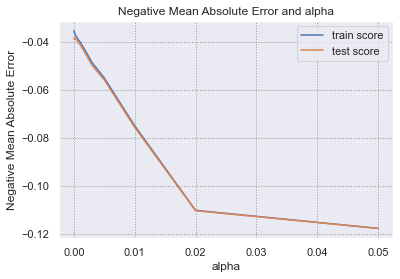

In [98]:
##Plotting mean test and train scores with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting the results
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [99]:
#Finding best estimator
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [100]:
# check the coefficient values with lambda = 0.0001

lasso = Lasso(alpha=0.0001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  0.037902899345704844
Coefficients:
  [ 0.0448305   0.06847711  0.18467072 -0.07857205  0.06197999 -0.18111779
  0.28984895  0.04010343  0.0780906   0.01830533 -0.          0.02000034
 -0.03496774 -0.05248675 -0.03383512 -0.02324753  0.          0.01534966
  0.09150346 -0.02853542  0.01699427  0.03862441  0.06169577  0.03346524
  0.07022535 -0.04419908 -0.00523401 -0.          0.         -0.
  0.07271865  0.15516309  0.15130959 -0.01614094  0.03250806  0.01653058
  0.         -0.          0.0416923   0.          0.00704549  0.02824184
  0.0151198   0.0097119   0.         -0.         -0.00829583 -0.
 -0.         -0.          0.         -0.00876705  0.          0.03541112
  0.         -0.02877552  0.04215066  0.         -0.04672303  0.
  0.          0.09200232 -0.          0.          0.03508325]


In [101]:
#Making predictions for train and test sets with Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

In [102]:
#Getting the R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

In [103]:
#Checking the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

In [104]:
#Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

In [105]:
#Checking Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

In [106]:
print("For Lasso Regression Model (Original Model, alpha=0.0001):\n","="*80)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train.round(4),"\nMSE score:",MSE_lasso_train.round(4),"\nMAE score:",MAE_lasso_train.round(4),\
     "\nRMSE score:",RMSE_lasso_train.round(4),"\n","="*80)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test.round(4),"\nMSE score:",MSE_lasso_test.round(4),"\nMAE score:",MAE_lasso_test.round(4),\
      "\nRMSE score:",RMSE_lasso_test.round(4),"\n","="*80)

For Lasso Regression Model (Original Model, alpha=0.0001):

For Train Set:
R2 score: 0.9032 
MSE score: 0.0023 
MAE score: 0.0363 
RMSE score: 0.048 

For Test Set:
R2 score: 0.8971 
MSE score: 0.0027 
MAE score: 0.0394 
RMSE score: 0.0521 


**Creating a Dataframe to check the mean train and test scores**

In [107]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  
lasso_df.head(10) 

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0             TotalArea       0.2898                            0.2898
1             GrLivArea       0.1847                            0.1847
2           BuildingAge      -0.1811                            0.1811
3         OverallQual_9       0.1552                            0.1552
4        OverallQual_10       0.1513                            0.1513
5          SaleType_New       0.0920                            0.0920
6  Neighborhood_Crawfor       0.0915                            0.0915
7          BedroomAbvGr      -0.0786                            0.0786
8             PorchArea       0.0781                            0.0781
9         OverallQual_8       0.0727                            0.0727

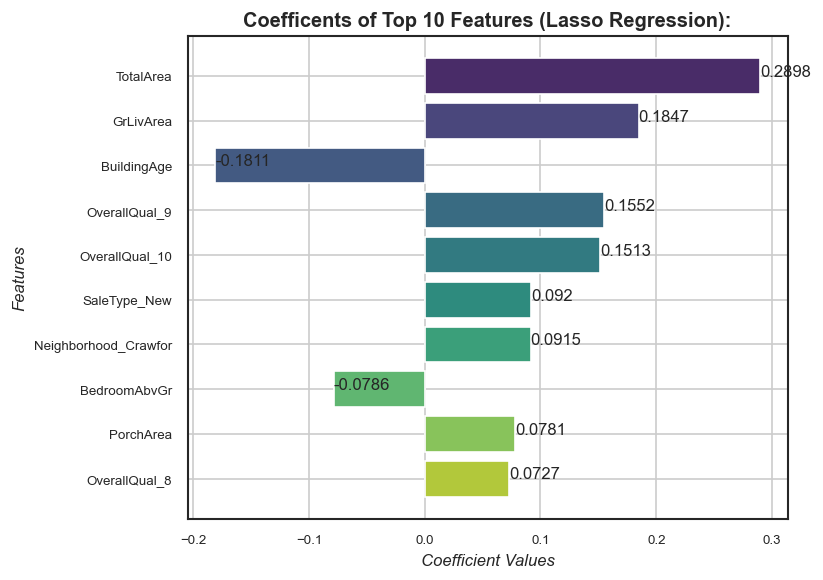

In [108]:
##Coefficient value plot (Lasso Regression)

lasso_df_top10= lasso_df.loc[:9] #Lasso_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(7,5), dpi=120)
ax4= sns.barplot(y=lasso_df_top10['Features'], x=lasso_df_top10['Coefficient'], palette='viridis')

plt.xlabel('Coefficient Values', fontsize= 10, fontstyle='italic')
plt.ylabel('Features' , fontsize= 10, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Lasso Regression):', fontsize=12,fontweight='bold')

c= lasso_df_top10['Coefficient'] #Storing coefficient values
for index, value in enumerate(c):
    plt.text(value, index, str(value), fontsize=10)

plt.grid(True)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.autoscale()
plt.tight_layout()
plt.show()

## <font color = 'Green'> Lasso Model Evaluation

## <font color = 'Blue'> Training Performance Evaluation

### Histogram for Error terms

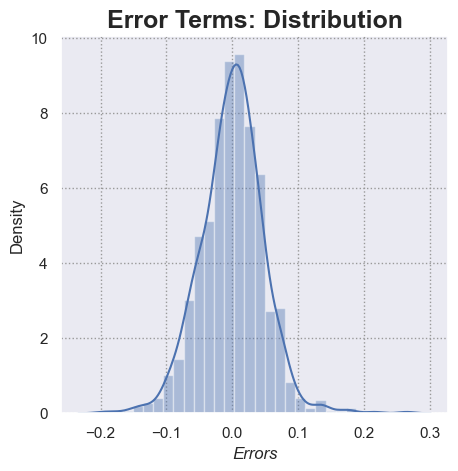

In [109]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train - y_pred_train_l)     #residuals
sns.distplot(res1 , bins = 30, color='b')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

**The error terms in Train set are distributed around mean 0**

### Residuals' Relationship

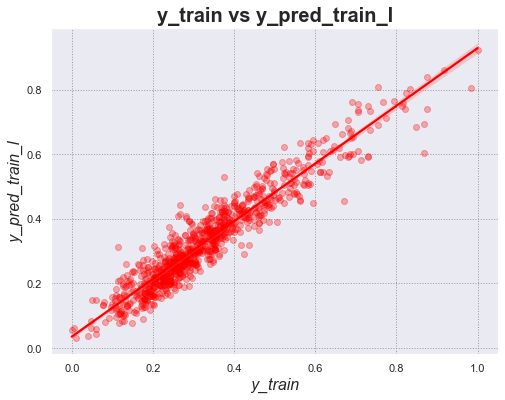

In [110]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize = (8,6))
sns.regplot(y_train,y_pred_train_l,color='red',scatter_kws={'alpha':0.3})
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

**Hence there is a linear relationship amongst the terms.**

## <font color = 'Blue'> Test Performance Evaluation

### Histogram for Error Terms

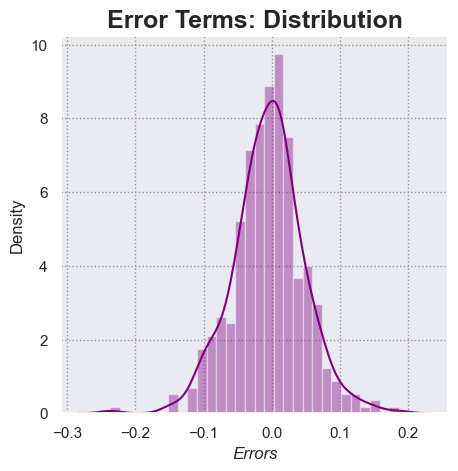

In [111]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30,color='purple')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

**The error terms in Test set are distributed around mean 0**

### Residuals' Relationship

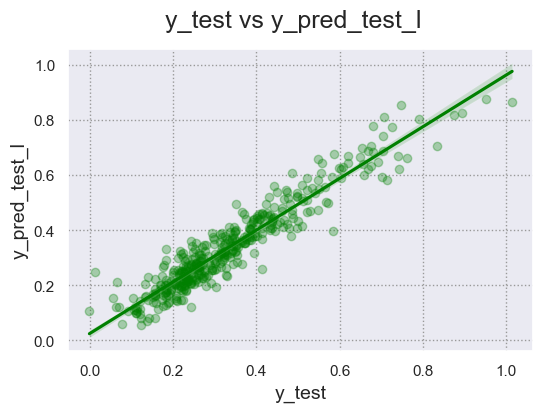

In [112]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig = plt.figure(figsize=(6,4), dpi=100)
sns.regplot(y_test,y_pred_test_l, color="green",scatter_kws={'alpha':0.3})
fig.suptitle('y_test vs y_pred_test_l', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_l', fontsize=14)  
plt.grid(True)
plt.show()

**Hence there is a linear relationship amongst the terms.**

## <font color = 'Red'>Comparing the Ridge and Lasso Models for the features.

In [113]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [114]:
## Now filling in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

#### Comapring the coefficients for the selected features

In [115]:
betas

Ridge     Lasso
LotArea                0.052946  0.044831
BsmtUnfSF              0.063640  0.068477
GrLivArea              0.189411  0.184671
BedroomAbvGr          -0.080634 -0.078572
GarageCars             0.065939  0.061980
BuildingAge           -0.176217 -0.181118
TotalArea              0.262538  0.289849
BathroomNos            0.055450  0.040103
PorchArea              0.081965  0.078091
MSSubClass_45          0.025033  0.018305
MSSubClass_75          0.032915 -0.000000
MSSubClass_85          0.027762  0.020000
MSSubClass_120        -0.037341 -0.034968
MSSubClass_160        -0.058907 -0.052487
MSSubClass_180        -0.041971 -0.033835
LotShape_IR3          -0.038507 -0.023248
LotConfig_FR3          0.027296  0.000000
Neighborhood_BrDale    0.028340  0.015350
Neighborhood_Crawfor   0.091402  0.091503
Neighborhood_Mitchel  -0.028573 -0.028535
Neighborhood_NPkVill   0.031327  0.016994
Neighborhood_NoRidge   0.043863  0.038624
Neighborhood_NridgHt   0.066921  0.061696
Neighborhood_Somerst   0.036211  0.033465
Neighborhood_StoneBr   0.079656  0.070225
Condition1_RRAe       -0.049449 -0.044199
HouseStyle_2.5Fin     -0.043628 -0.005234
HouseStyle_2.5Unf     -0.033448 -0.000000
HouseStyle_SFoyer     -0.003486  0.000000
OverallQual_2         -0.009318 -0.000000
OverallQual_8          0.072153  0.072719
OverallQual_9          0.150039  0.155163
OverallQual_10         0.129903  0.151310
OverallCond_2         -0.032714 -0.016141
RoofStyle_Gambrel      0.041083  0.032508
RoofStyle_Mansard      0.031100  0.016531
Exterior1st_AsphShn    0.000000  0.000000
Exterior1st_BrkComm   -0.045830 -0.000000
Exterior1st_BrkFace    0.044997  0.041692
Exterior1st_CBlock     0.000000  0.000000
Exterior1st_MetalSd    0.008742  0.007045
Exterior1st_Stucco     0.030475  0.028242
Exterior1st_VinylSd    0.016772  0.015120
Exterior1st_Wd Sdng    0.010662  0.009712
Exterior2nd_CBlock     0.000000  0.000000
Exterior2nd_Other     -0.039830 -0.000000
ExterQual_Fa          -0.022807 -0.008296
ExterCond_Fa           0.003632 -0.000000
ExterCond_Po          -0.009698 -0.000000
Foundation_Wood       -0.038441 -0.000000
BsmtQual_Fa            0.000408  0.000000
BsmtQual_Gd           -0.009045 -0.008767
BsmtCond_Po            0.000000  0.000000
BsmtExposure_Gd        0.038624  0.035411
Electrical_Mix         0.000000  0.000000
Functional_Sev        -0.058682 -0.028776
Functional_Typ         0.039200  0.042151
GarageType_Basment     0.007967  0.000000
GarageType_CarPort    -0.051559 -0.046723
SaleType_CWD           0.035989  0.000000
SaleType_Con           0.017986  0.000000
SaleType_New           0.092716  0.092002
SaleType_Oth          -0.000601 -0.000000
SaleCondition_AdjLand  0.019379  0.000000
SaleCondition_Normal   0.035426  0.035083

In [116]:
## Setting float display options
pd.options.display.float_format = "{:,.4f}".format

###  Evaluation Metrics for Ridge and Lasso Regressions

In [117]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)',
                       'MSE (Train)','MSE (Test)','MAE (Train)','MAE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : [r2_score_ridge_train,r2_score_ridge_test,MSE_ridge_train,MSE_ridge_test,MAE_ridge_train,MAE_ridge_test,RMSE_ridge_train,RMSE_ridge_test],
            'Lasso Regression' : [r2_score_lasso_train,r2_score_lasso_test,MSE_lasso_train,MSE_lasso_test,MAE_lasso_train,MAE_lasso_test,RMSE_lasso_train,RMSE_lasso_test]
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)            0.9055            0.9032
R2 Score (Test)             0.8926            0.8971
MSE (Train)                 0.0022            0.0023
MSE (Test)                  0.0028            0.0027
MAE (Train)                 0.0359            0.0363
MAE (Test)                  0.0403            0.0394
RMSE (Train)                0.0474            0.0480
RMSE (Test)                 0.0532            0.0521

### Top 10 Features selected by Ridge Regression

In [118]:
ridge_df[["Features","Coefficient"]].head(10)

Features  Coefficient
0             TotalArea       0.2625
1             GrLivArea       0.1894
2           BuildingAge      -0.1762
3         OverallQual_9       0.1500
4        OverallQual_10       0.1299
5          SaleType_New       0.0927
6  Neighborhood_Crawfor       0.0914
7             PorchArea       0.0820
8          BedroomAbvGr      -0.0806
9  Neighborhood_StoneBr       0.0797

### Top 10 Features selected by Lasso Regression

In [119]:
lasso_df[["Features","Coefficient"]].head(10)

Features  Coefficient
0             TotalArea       0.2898
1             GrLivArea       0.1847
2           BuildingAge      -0.1811
3         OverallQual_9       0.1552
4        OverallQual_10       0.1513
5          SaleType_New       0.0920
6  Neighborhood_Crawfor       0.0915
7          BedroomAbvGr      -0.0786
8             PorchArea       0.0781
9         OverallQual_8       0.0727

# <font color = 'Green'>  Concluding Remarks

####  Both the Ridge and Lasso Models give nearly similar values for the evaluation metrics, but Lasso model performs better in Test set and hence it is slightly better.

#### The top factors affecting the Sale-Price for the buildings are :


- ####  Total Area of the Building

- ####  Above grade (ground) living area square feet

- ####  Age of the Building.

- ####  Overall Quality

- ####  Sale Type.

- ####  Neighbourhood.

#### Thus Surprise Housing Company management should provide more weightage to the above mentioned features while forecasting value of the prospective properties.

# <font color = 'Green'> <center> ===================================================== </center>

### Question 1: 

**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

**Ans:**

As per the model best parameters :
- Ridge Regression Model --- **alpha=1.0**
- Lasso Regression Model --- **alpha=0.0001**

After doubling the alpha parameters:

- Ridge Regression Model --- **alpha=2.0**
- Lasso Regression Model --- **alpha=0.0002**
    

In [120]:
ridge = Ridge(alpha=2)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)


y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)


r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)


MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)


MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)


RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)

print("For Ridge Regression Model (New Model, alpha=2.0):\n","="*80)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train.round(4),"\nMSE score:",MSE_ridge_train.round(4),"\nMAE score:",MAE_ridge_train.round(4),\
     "\nRMSE score:",RMSE_ridge_train.round(4),"\n","="*80)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test.round(4),"\nMSE score:",MSE_ridge_test.round(4),"\nMAE score:",MAE_ridge_test.round(4),\
      "\nRMSE score:",RMSE_ridge_test.round(4),"\n","="*80)

Intercept:  0.03721114263523412
Coefficients:
 [ 0.05606085  0.05908947  0.18439965 -0.06745264  0.07182023 -0.1651382
  0.24468718  0.06580058  0.0812157   0.02080543  0.01934794  0.02397817
 -0.03247389 -0.05478807 -0.03675798 -0.03216097  0.01672538  0.02288082
  0.08983474 -0.02774403  0.0239025   0.04323816  0.0692279   0.03627102
  0.07492373 -0.04599841 -0.03047433 -0.0179098  -0.00322379 -0.00876623
  0.07392001  0.14462224  0.09690096 -0.02827233  0.03578299  0.02514799
  0.         -0.02922792  0.04384748  0.          0.00720254  0.02715325
  0.01708696  0.00964633  0.         -0.02445352 -0.02039575 -0.00031561
 -0.007504   -0.02489469 -0.00181327 -0.00854782  0.          0.04008592
  0.         -0.03912215  0.03922474  0.00676715 -0.04834707  0.02505965
  0.01207936  0.091786   -0.00085362  0.0128084   0.03459785]
For Ridge Regression Model (New Model, alpha=2.0):

For Train Set:
R2 score: 0.903 
MSE score: 0.0023 
MAE score: 0.0362 
RMSE score: 0.048 

For Test Set:
R2 sco

In [121]:
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})


ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  
print("For Ridge Regression (Doubled alpha model, alpha=2): \n","="*125)
print("The most important predictor variables after the change is implemented are as follows:\n\n",\
      list(ridge_df['Features'].head(10)),"\n", "="*125)

For Ridge Regression (Doubled alpha model, alpha=2): 
The most important predictor variables after the change is implemented are as follows:

 ['TotalArea', 'GrLivArea', 'BuildingAge', 'OverallQual_9', 'OverallQual_10', 'SaleType_New', 'Neighborhood_Crawfor', 'PorchArea', 'Neighborhood_StoneBr', 'OverallQual_8'] 


In [122]:

lasso = Lasso(alpha=0.0002)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)


y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)


r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)


MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)


MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)


RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (New Model: alpha=0.0002):\n","="*80)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train.round(4),"\nMSE score:",MSE_lasso_train.round(4),"\nMAE score:",MAE_lasso_train.round(4),\
     "\nRMSE score:",RMSE_lasso_train.round(4),"\n","="*80)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test.round(4),"\nMSE score:",MSE_lasso_test.round(4),"\nMAE score:",MAE_lasso_test.round(4),\
      "\nRMSE score:",RMSE_lasso_test.round(4),"\n","="*80)


Intercept:  0.030607430976828387
Coefficients:
  [ 0.04200394  0.06776158  0.17780764 -0.06446673  0.06737724 -0.17097456
  0.29349811  0.03789684  0.07560429  0.00617931 -0.          0.01143566
 -0.02803457 -0.04321982 -0.01681977 -0.          0.          0.
  0.08947579 -0.02462201  0.          0.03254047  0.06030968  0.03007573
  0.05968762 -0.03451295 -0.         -0.          0.         -0.
  0.07489721  0.15292421  0.10545225 -0.          0.01688939  0.
  0.         -0.          0.03669561  0.          0.00398563  0.01902646
  0.01396     0.00706843  0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.00773334  0.          0.03443282
  0.         -0.          0.04306848  0.         -0.03608215  0.
  0.          0.09163468 -0.          0.          0.03405927]
For Lasso Regression Model (New Model: alpha=0.0002):

For Train Set:
R2 score: 0.899 
MSE score: 0.0024 
MAE score: 0.0369 
RMSE score: 0.049 

For Test Set:
R2 score: 0.8955 
MSE score: 0.0028 
MAE

In [123]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})


lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  
print("For Lasso Regression (Doubled alpha model: alpha:0.0002): \n","="*125)
print("The most important predictor variables after the change is implemented are as follows:\n\n",\
      list(lasso_df['Features'].head(10)),"\n", "="*125)

For Lasso Regression (Doubled alpha model: alpha:0.0002): 
The most important predictor variables after the change is implemented are as follows:

 ['TotalArea', 'GrLivArea', 'BuildingAge', 'OverallQual_9', 'OverallQual_10', 'SaleType_New', 'Neighborhood_Crawfor', 'PorchArea', 'OverallQual_8', 'BsmtUnfSF'] 


### Question 2

**You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?**

**Answer in PDF**

### Question 3

**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

In [124]:
top5_lasso_features=["TotalArea","GrLivArea","BuildingAge","OverallQual_9","OverallQual_10"]

In [125]:
X_train=X_train.drop(top5_lasso_features, axis=1)
X_test=X_test.drop(top5_lasso_features, axis=1)

In [126]:
X_train.head()

LotArea  BsmtUnfSF  BedroomAbvGr  GarageCars  BathroomNos  PorchArea  \
355    0.3472     0.1821        0.5000      0.5000       0.4000     0.0253   
1115   0.3763     0.4129        0.5000      0.7500       0.4000     0.0000   
343    0.2634     0.9367        0.3333      0.5000       0.2000     0.5521   
1123   0.2828     0.3948        0.3333      0.0000       0.1000     0.1947   
87     0.0925     0.3462        0.3333      0.5000       0.3000     0.2278   

      MSSubClass_45  MSSubClass_75  MSSubClass_85  MSSubClass_120  \
355          0.0000         0.0000         0.0000          0.0000   
1115         0.0000         0.0000         0.0000          0.0000   
343          0.0000         0.0000         0.0000          1.0000   
1123         0.0000         0.0000         0.0000          0.0000   
87           0.0000         0.0000         0.0000          0.0000   

      MSSubClass_160  MSSubClass_180  LotShape_IR3  LotConfig_FR3  \
355           0.0000          0.0000        0.0000         0.0000   
1115          0.0000          0.0000        0.0000         0.0000   
343           0.0000          0.0000        0.0000         0.0000   
1123          0.0000          0.0000        0.0000         0.0000   
87            1.0000          0.0000        0.0000         0.0000   

      Neighborhood_BrDale  Neighborhood_Crawfor  Neighborhood_Mitchel  \
355                0.0000                0.0000                0.0000   
1115               0.0000                0.0000                0.0000   
343                0.0000                0.0000                0.0000   
1123               0.0000                0.0000                0.0000   
87                 0.0000                0.0000                0.0000   

      Neighborhood_NPkVill  Neighborhood_NoRidge  Neighborhood_NridgHt  \
355                 0.0000                0.0000                0.0000   
1115                0.0000                0.0000                1.0000   
343                 0.0000                0.0000                1.0000   
1123                0.0000                0.0000                0.0000   
87                  0.0000                0.0000                0.0000   

      Neighborhood_Somerst  Neighborhood_StoneBr  Condition1_RRAe  \
355                 0.0000                0.0000           0.0000   
1115                0.0000                0.0000           0.0000   
343                 0.0000                0.0000           0.0000   
1123                0.0000                0.0000           0.0000   
87                  1.0000                0.0000           0.0000   

      HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_SFoyer  OverallQual_2  \
355              0.0000             0.0000             0.0000         0.0000   
1115             0.0000             0.0000             0.0000         0.0000   
343              0.0000             0.0000             0.0000         0.0000   
1123             0.0000             0.0000             0.0000         0.0000   
87               0.0000             0.0000             0.0000         0.0000   

      OverallQual_8  OverallCond_2  RoofStyle_Gambrel  RoofStyle_Mansard  \
355          0.0000         0.0000             0.0000             0.0000   
1115         1.0000         0.0000             0.0000             0.0000   
343          0.0000         0.0000             0.0000             0.0000   
1123         0.0000         0.0000             0.0000             0.0000   
87           0.0000         0.0000             0.0000             0.0000   

      Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  \
355                0.0000               0.0000               0.0000   
1115               0.0000               0.0000               0.0000   
343                0.0000               0.0000               0.0000   
1123               0.0000               0.0000               0.0000   
87                 0.0000               0.0000               0.0000   

      Exterior1st_CBlock  Exterior1st_Metal

In [127]:
lasso = Lasso(alpha=0.0001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)


y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)


r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)


MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)


MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)


RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (alpha=0.0001):\n","="*80)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train.round(4),"\nMSE score:",MSE_lasso_train.round(4),"\nMAE score:",MAE_lasso_train.round(4),\
     "\nRMSE score:",RMSE_lasso_train.round(4),"\n","="*80)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test.round(4),"\nMSE score:",MSE_lasso_test.round(4),"\nMAE score:",MAE_lasso_test.round(4),\
      "\nRMSE score:",RMSE_lasso_test.round(4),"\n","="*80)

Intercept:  -0.0018782182975891626
Coefficients:
  [ 0.14622806  0.03471889  0.03771496  0.1829829   0.32620991  0.13436365
 -0.00186157  0.01317729  0.         -0.0170178  -0.03945948 -0.0339
 -0.03650595  0.          0.02412063  0.11141622 -0.02400471  0.
  0.08713759  0.14203889  0.04987475  0.12227019 -0.05595708 -0.
  0.         -0.00944219 -0.02732649  0.08190072 -0.05215842  0.02871526
  0.00231981  0.         -0.          0.04797675  0.         -0.00379131
  0.00040565  0.0229802  -0.00320012  0.         -0.01650012 -0.02397909
 -0.01043049  0.         -0.         -0.03070216 -0.00633484  0.
  0.05887842  0.         -0.          0.02083013  0.01032968 -0.07053631
  0.02364934  0.          0.10870763  0.         -0.          0.03726766]
For Lasso Regression Model (alpha=0.0001):

For Train Set:
R2 score: 0.8 
MSE score: 0.0048 
MAE score: 0.0526 
RMSE score: 0.069 

For Test Set:
R2 score: 0.7747 
MSE score: 0.0059 
MAE score: 0.0555 
RMSE score: 0.0771 


In [128]:
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  
print("For Lasso Regression alpha:0.0001: \n","="*125)
print("The Five most important predictor variables after the changing the data:\n\n",\
      list(lasso_df['Features'].head()),"\n", "="*125)

For Lasso Regression alpha:0.0001: 
The Five most important predictor variables after the changing the data:

 ['BathroomNos', 'GarageCars', 'LotArea', 'Neighborhood_NridgHt', 'PorchArea'] 


#### Question 4

**How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?**

**Answer in notebook**

# <center> Thank You </center>

-------------------------------------------------------------------